<ipython-input-1-dcc4ccd64bfb>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean()


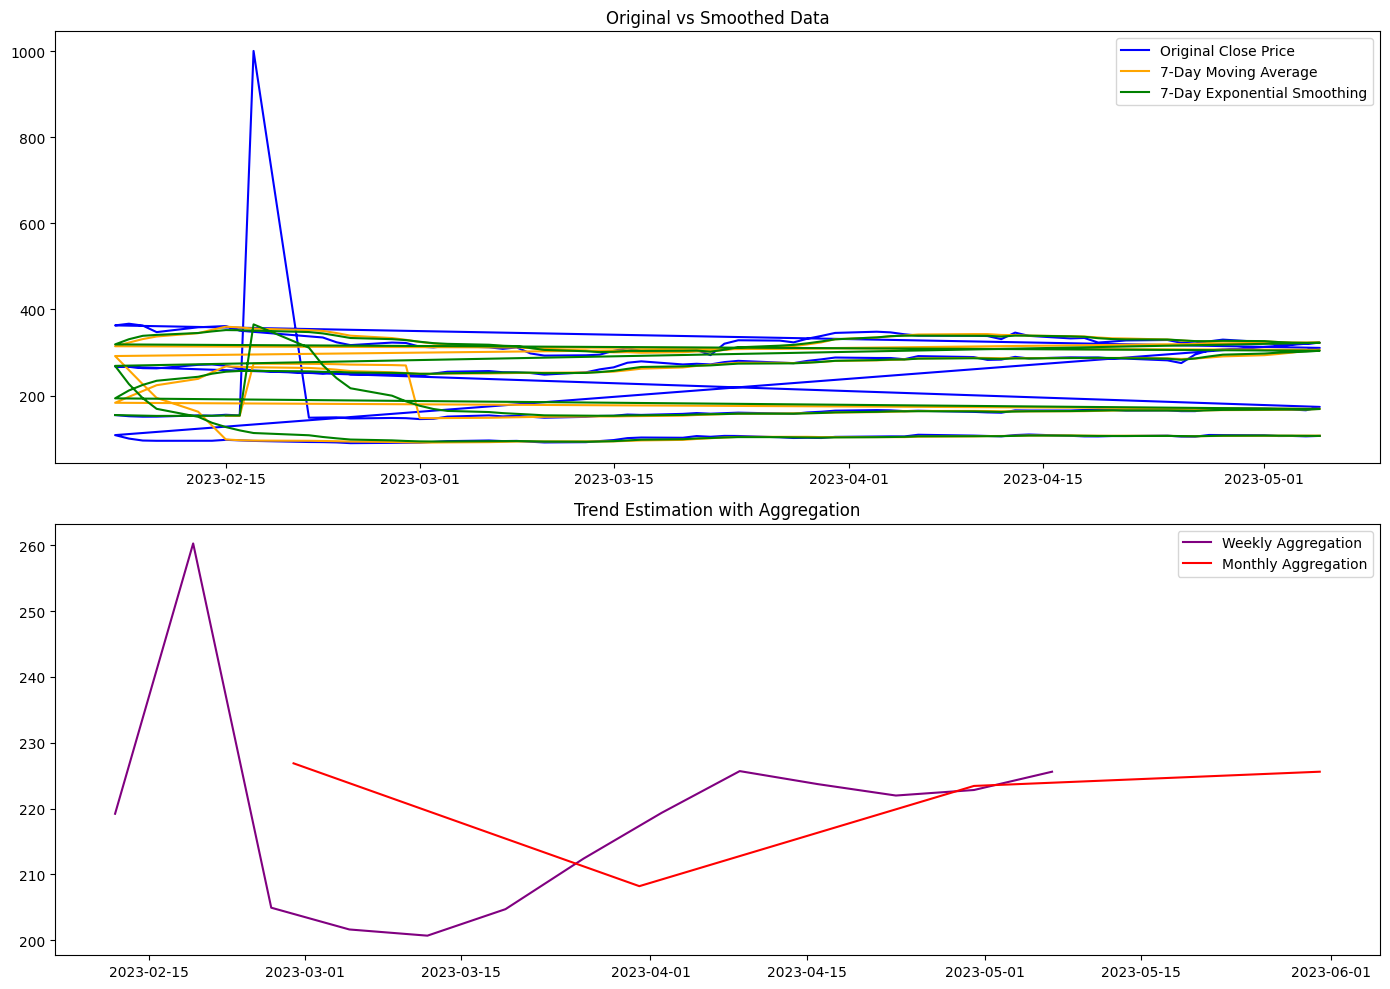

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Aggregation: Resampling by week (W) and month (M) for trend estimation
weekly_data = data['Close'].resample('W').mean()
monthly_data = data['Close'].resample('M').mean()

# Smoothing: Moving Average and Exponential Smoothing
data['MA_7'] = data['Close'].rolling(window=7).mean()  # 7-day moving average
data['EMA_7'] = data['Close'].ewm(span=7, adjust=False).mean()  # 7-day exponential smoothing

# Plotting the original and smoothed data
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot original vs smoothed data
ax[0].plot(data.index, data['Close'], label='Original Close Price', color='blue')
ax[0].plot(data.index, data['MA_7'], label='7-Day Moving Average', color='orange')
ax[0].plot(data.index, data['EMA_7'], label='7-Day Exponential Smoothing', color='green')
ax[0].set_title('Original vs Smoothed Data')
ax[0].legend()

# Plot weekly and monthly aggregation
ax[1].plot(weekly_data.index, weekly_data, label='Weekly Aggregation', color='purple')
ax[1].plot(monthly_data.index, monthly_data, label='Monthly Aggregation', color='red')
ax[1].set_title('Trend Estimation with Aggregation')
ax[1].legend()

plt.tight_layout()
plt.show()
